In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import solve

# Define the basis functions (linear in this example)
def phi(i, x, N):
    if i == 0:
        return 1 - x
    elif i == N:
        return x
    else:
        return max(1 - abs(x - i/(N-1))*(N-1), 0)

# Derivative of the basis function
def dphi(i, x, N):
    if i == 0:
        return -1
    elif i == N:
        return 1
    else:
        if x < i/(N-1):
            return N-1
        elif x > i/(N-1):
            return -(N-1)
        else:
            return 0
        
def exact_soln(x):
    y = -(x**4)/6 + 17*x/3
    return y

In [15]:
# Number of basis functions (set a value for N)
N = 10

# Assemble the stiffness matrix and load vector
K = np.zeros((N, N))
F = np.zeros(N)

# Integration over the domain for each pair of basis functions
for i in range(N):
    for j in range(N):
        K[i, j] = quad(lambda x: dphi(i, x, N) * dphi(j, x, N), 0, 1)[0]
    # Load vector
    F[i] = quad(lambda x: phi(i, x, N) * 2 * x**2, 0, 1)[0]

# Adjust for boundary condition at x=1 (Neumann condition)
F[-1] += 5

# Apply Dirichlet boundary condition at x=0
# Since y(0) = 0, we set the first coefficient y_0 to 0
# This reduces our system to the remaining N-1 equations
K = K[1:, 1:]
F = F[1:]

print(K)
print(F)

[[ 81.          63.          45.          27.           9.
   -8.99999993 -27.         -45.         -63.        ]
 [ 63.          81.          63.          45.          27.
    9.          -9.         -27.         -45.        ]
 [ 45.          63.          81.          63.          45.
   27.           9.          -8.99999993 -27.        ]
 [ 27.          45.          63.          81.          63.
   45.          27.           9.          -9.        ]
 [  9.          27.          45.          63.          81.
   63.          45.          27.           9.        ]
 [ -8.99999993   9.          27.          45.          63.
   81.          63.          45.          27.        ]
 [-27.          -9.           9.          27.          45.
   63.          81.          63.          45.        ]
 [-45.         -27.          -8.99999993   9.          27.
   45.          63.          81.          63.        ]
 [-63.         -45.         -27.          -9.           9.
   27.          45.          

/tmp/ipykernel_220895/93285231.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  K[i, j] = quad(lambda x: dphi(i, x, N) * dphi(j, x, N), 0, 1)[0]


In [16]:
# Solve the system for y_i coefficients
y = solve(K, F)

# Since y(0) = 0, prepend the solution with 0
y = np.concatenate(([0], y))

print(y)

[ 0.00000000e+00  1.41613321e-01 -1.52416064e-04 -1.52415255e-04
 -1.52416056e-04 -1.52415514e-04 -1.52416342e-04 -1.52415515e-04
 -1.35719911e-01  2.78704974e-01]


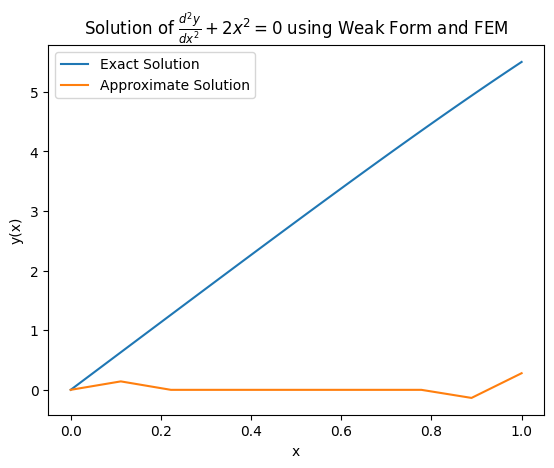

In [17]:
# Plot the solution
x_vals = np.linspace(0, 1, 100)
y_vals = np.array([sum(y[i] * phi(i, x, N) for i in range(N)) for x in x_vals])

# Plot the exact solution
y_exact = exact_soln(x_vals)
plt.plot(x_vals, y_exact, label='Exact Solution')

plt.plot(x_vals, y_vals, label='Approximate Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solution of $\\frac{d^2y}{dx^2} + 2x^2 = 0$ using Weak Form and FEM')
plt.legend()
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Number of elements and nodes
num_elements = 8
num_nodes = num_elements + 1

# Length of the beam
L = 10
EI = 3

# Uniform load
q = 1

# Element length
le = L / num_elements

# Initialize stiffness matrix and load vector
K = np.zeros((num_nodes, num_nodes))
F = np.zeros(num_nodes)

# Element stiffness matrix for each element
ke = (EI / le) * np.array([[1, -1], [-1, 1]])

# Global stiffness matrix assembly
for i in range(num_elements):
    K[i:i+2, i:i+2] += ke
    F[i:i+2] += q * le / 2

# Boundary conditions: w(0) = 0, w(L) = 0
K[0, 0] = K[-1, -1] = 1
K[0, 1] = K[-1, -2] = 0
F[0] = F[-1] = 0

print(K)
print(F)

[[ 1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-2.4  4.8 -2.4  0.   0.   0.   0.   0.   0. ]
 [ 0.  -2.4  4.8 -2.4  0.   0.   0.   0.   0. ]
 [ 0.   0.  -2.4  4.8 -2.4  0.   0.   0.   0. ]
 [ 0.   0.   0.  -2.4  4.8 -2.4  0.   0.   0. ]
 [ 0.   0.   0.   0.  -2.4  4.8 -2.4  0.   0. ]
 [ 0.   0.   0.   0.   0.  -2.4  4.8 -2.4  0. ]
 [ 0.   0.   0.   0.   0.   0.  -2.4  4.8 -2.4]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1. ]]
[0.   1.25 1.25 1.25 1.25 1.25 1.25 1.25 0.  ]


In [31]:
# Solve the system of equations
w = np.linalg.solve(K, F)
print(w)

[-0.          1.82291667  3.125       3.90625     4.16666667  3.90625
  3.125       1.82291667  0.        ]


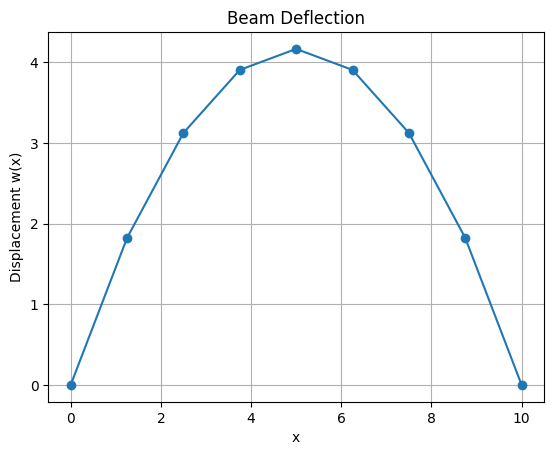

In [32]:
# Plot the results
x = np.linspace(0, L, num_nodes)
plt.plot(x, w, '-o')
plt.xlabel('x')
plt.ylabel('Displacement w(x)')
plt.title('Beam Deflection')
plt.grid(True)
plt.show()

In [1]:
import numpy as np

# Problem parameters
L = 10            # Length of the beam
EI = 3            # Flexural rigidity (E * I)
q = 1             # Uniform load
n = 8             # Number of elements (can change to 2, 4, 8)
h = L / n         # Length of each element

# Stiffness matrix for a single element
def element_stiffness(EI, h):
    return EI / h**3 * np.array([[12, 6*h, -12, 6*h],
                                 [6*h, 4*h**2, -6*h, 2*h**2],
                                 [-12, -6*h, 12, -6*h],
                                 [6*h, 2*h**2, -6*h, 4*h**2]])

# Load vector for a single element
def element_load(q, h):
    return q * h / 2 * np.array([h / 2, h**2 / 12, h / 2, -h**2 / 12])

# Global stiffness matrix and force vector initialization
K_global = np.zeros((2*n+2, 2*n+2))
F_global = np.zeros(2*n+2)

# Assembly of the global stiffness matrix and force vector
for i in range(n):
    K_e = element_stiffness(EI, h)
    F_e = element_load(q, h)
    
    # Global index for the element
    indices = [2*i, 2*i+1, 2*i+2, 2*i+3]
    
    # Assemble the global stiffness matrix and force vector
    for ii in range(4):
        for jj in range(4):
            K_global[indices[ii], indices[jj]] += K_e[ii, jj]
        F_global[indices[ii]] += F_e[ii]

# Apply boundary conditions
# For simply supported: w(0) = w(L) = 0 -> first and last entries
K_global = K_global[1:-1, 1:-1]  # Remove first and last rows/cols
F_global = F_global[1:-1]        # Remove first and last forces

# Solve the system of equations
w = np.linalg.solve(K_global, F_global)

# Add boundary conditions back into the solution vector
w_full = np.zeros(2*n+2)
w_full[1:-1] = w

# Display the results
print("Nodal Displacements:")
for i in range(2*n+2):
    print(f"w[{i}] = {w_full[i]}")

# The results 'w_full' contains the nodal displacements

Nodal Displacements:
w[0] = 0.0
w[1] = 69.44444444449383
w[2] = 86.14857991542594
w[3] = 67.8846571181041
w[4] = 168.5248480903986
w[5] = 63.47656250004633
w[6] = 243.82273356137443
w[7] = 56.62706163198699
w[8] = 309.24479166689315
w[9] = 47.74305555559267
w[10] = 362.5022040475776
w[11] = 37.23144531252994
w[12] = 401.814778646134
w[13] = 25.499131944465592
w[14] = 425.9109497073522
w[15] = 12.953016493066604
w[16] = 434.02777777810564
w[17] = 0.0


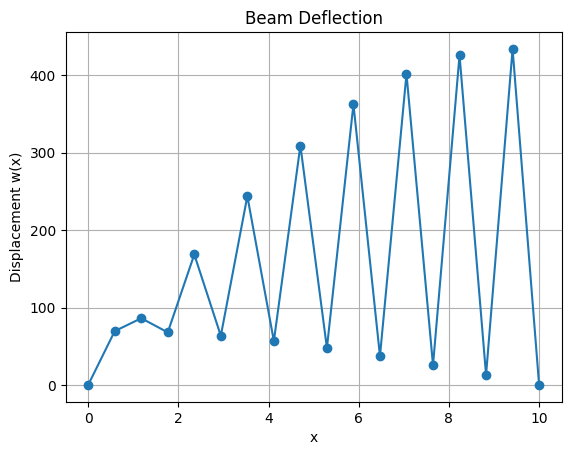

In [2]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, L, 2*n+2), w_full, '-o')
plt.xlabel('x')
plt.ylabel('Displacement w(x)')
plt.title('Beam Deflection')
plt.grid(True)
plt.show()